In [1]:
!nvidia-smi

Thu Apr 20 09:10:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    47W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Deep_Learning_COM3025/dataverse_files.zip -d /content/

In [ ]:
!unzip /content/HAM10000_images_part_1.zip -d /content/HAM10000/
!unzip /content/HAM10000_images_part_2.zip -d /content/HAM10000/

In [ ]:
!unzip /content/ISIC2018_Task3_Test_Images.zip -d /content/

In [ ]:
!unzip /content/HAM10000_segmentations_lesion_tschandl.zip -d /content/

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
ham_meta = pd.read_csv('/content/ISIC2018_Task3_Test_GroundTruth.csv')

In [9]:
ham_meta

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAMTEST_0000000,ISIC_0034524,nv,follow_up,40.0,female,back,vidir_molemax
1,HAMTEST_0000001,ISIC_0034525,nv,histo,70.0,male,abdomen,rosendahl
2,HAMTEST_0000002,ISIC_0034526,bkl,histo,70.0,male,back,rosendahl
3,HAMTEST_0000003,ISIC_0034527,nv,histo,35.0,male,trunk,vienna_dias
4,HAMTEST_0000004,ISIC_0034528,nv,follow_up,75.0,female,trunk,vidir_molemax
...,...,...,...,...,...,...,...,...
1507,HAMTEST_0001219,ISIC_0036060,bkl,consensus,NaN,unknown,unknown,external
1508,HAMTEST_0001220,ISIC_0036061,nv,consensus,NaN,unknown,unknown,external
1509,HAMTEST_0001107,ISIC_0036062,akiec,histo,70.0,female,face,vidir_modern
1510,HAMTEST_0001221,ISIC_0036063,bkl,consensus,NaN,unknown,unknown,external


In [10]:
ham_meta['dx'].unique()

array(['nv', 'bkl', 'mel', 'akiec', 'bcc', 'vasc', 'df'], dtype=object)

In [11]:
ham_meta['image_id'].count()

1512

In [12]:
isci = pd.read_csv('/content/ISIC2018_Task3_Test_NatureMedicine_AI_Interaction_Benefit.csv')
isci

,image_id,interaction_modality,prob_m_mal,prob_m_dx_akiec,prob_m_dx_bcc,prob_m_dx_bkl,prob_m_dx_df,prob_m_dx_mel,prob_m_dx_nv,prob_m_dx_vasc,...,user_dx_without_interaction_mel,user_dx_without_interaction_nv,user_dx_without_interaction_vasc,user_dx_with_interaction_akiec,user_dx_with_interaction_bcc,user_dx_with_interaction_bkl,user_dx_with_interaction_df,user_dx_with_interaction_mel,user_dx_with_interaction_nv,user_dx_with_interaction_vasc
0,ISIC_0034524,Malignancy Probability (AI),"3,6112365E-07","3,90293E-08","8,117796E-08","1,230346E-06","6,8621403E-06","2,409164E-07","0,9999885","3,0752137E-06",...,0,0,0,0,0,0,0,0,1,0
1,ISIC_0034525,Malignancy Probability (AI),"0,00063954331927","4,6960016E-05","8,363065E-05","8,099651E-05","0,82006663","0,00050895265","0,17920908","3,744718E-06",...,0,1,0,0,0,0,0,0,1,0
2,ISIC_0034525,Multiclass Probabilities (Crowd),"0,00063954331927","4,6960016E-05","8,363065E-05","8,099651E-05","0,82006663","0,00050895265","0,17920908","3,744718E-06",...,0,0,0,0,0,0,0,0,1,0
3,ISIC_0034526,CBIR (AI),"0,03198014359805","0,01575451","0,00038216423","0,935222","0,00071165885","0,01584347","0,032083057","3,17123E-06",...,1,0,0,0,0,5,0,0,0,0
4,ISIC_0034526,Malignancy Probability (AI),"0,03198014359805","0,01575451","0,00038216423","0,935222","0,00071165885","0,01584347","0,032083057","3,17123E-06",...,2,0,0,0,0,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,ISIC_0036063,Multiclass Probabilities (Crowd),"0,00011647981833","2,462065E-08","5,546823E-08","0,99959","3,896521E-05","0,00011639973","0,00025452144","5,914618E-08",...,1,0,0,0,0,1,0,0,0,0
3758,ISIC_0036064,CBIR (AI),"0,49492367485072","0,00091662013","0,026780669","0,12464325","0,004785853","0,4672264","0,19267568","0,18297152",...,2,0,0,0,1,0,0,2,0,0
3759,ISIC_0036064,Malignancy Probability (AI),"0,49492367485072","0,00091662013","0,026780669","0,12464325","0,004785853","0,4672264","0,19267568","0,18297152",...,4,0,0,0,4,1,0,4,0,0
3760,ISIC_0036064,Multiclass Probabilities (AI),"0,49492367485072","0,00091662013","0,026780669","0,12464325","0,004785853","0,4672264","0,19267568","0,18297152",...,6,0,0,0,0,0,0,7,0,0


In [13]:
isci['image_id'].count()

3762

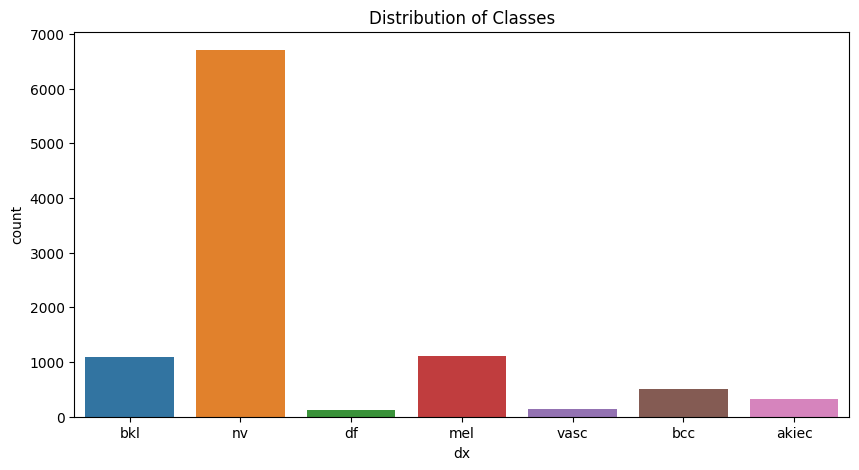

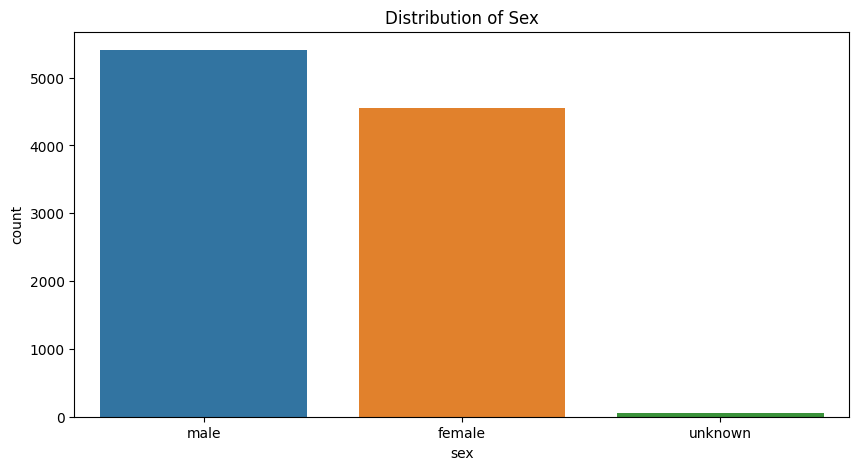

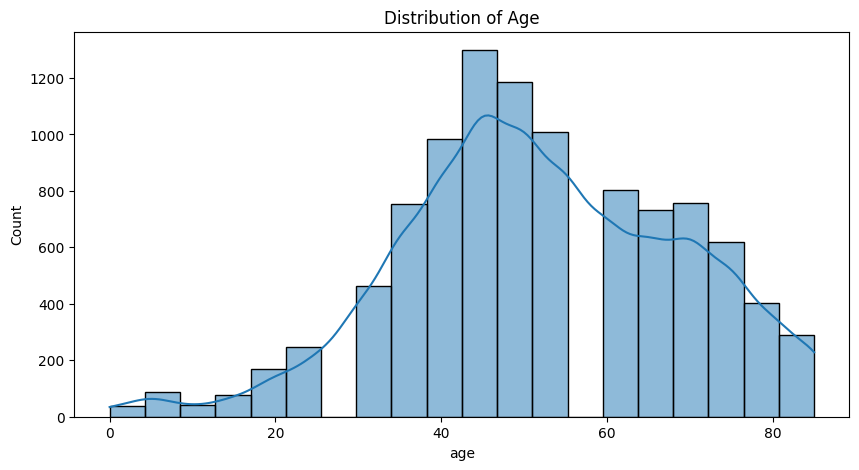

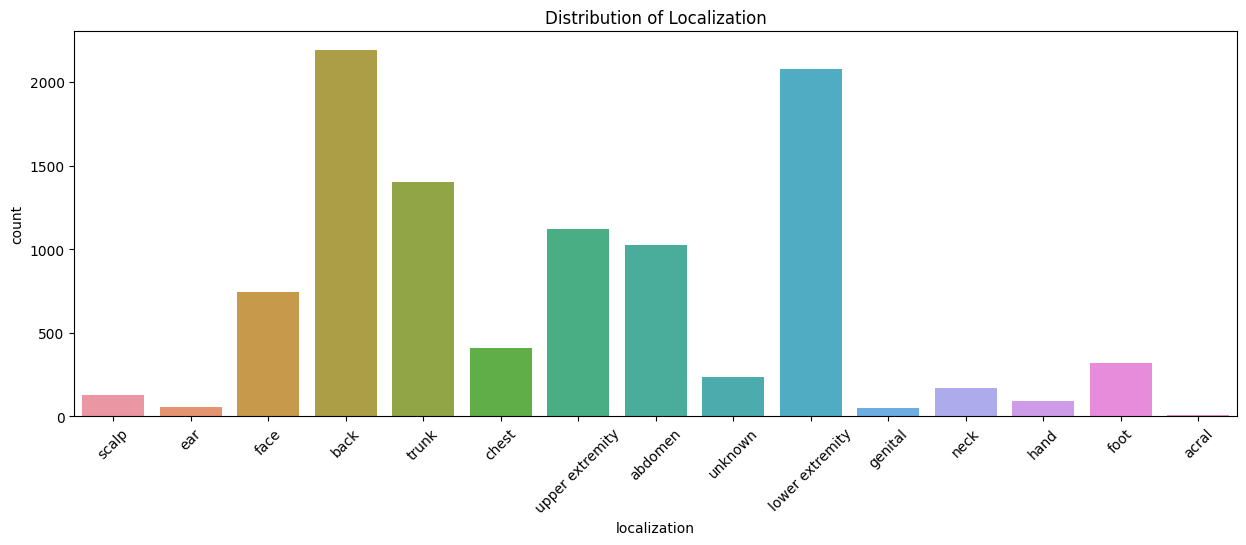

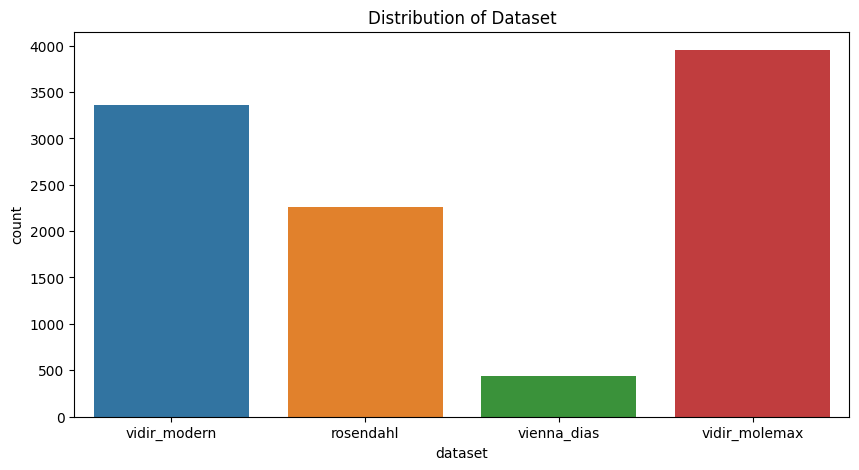

In [14]:
# Read the CSV file
csv_path = "/content/HAM10000_metadata"
df = pd.read_csv(csv_path)

# Distribution of the 'dx' column (classes)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='dx')
plt.title("Distribution of Classes")
plt.show()

# Distribution of the 'sex' column
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='sex')
plt.title("Distribution of Sex")
plt.show()

# Distribution of the 'age' column
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title("Distribution of Age")
plt.show()

# Distribution of the 'localization' column
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='localization')
plt.title("Distribution of Localization")
plt.xticks(rotation=45)
plt.show()

# Distribution of the 'dataset' column
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='dataset')
plt.title("Distribution of Dataset")
plt.show()


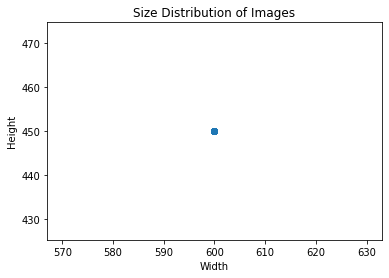

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

image_folder = "/content/HAM10000"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

# Collect the dimensions of all images
dimensions = []
for img_file in image_files:
    img = Image.open(os.path.join(image_folder, img_file))
    width, height = img.size
    dimensions.append((width, height))

# Separate widths and heights
widths, heights = zip(*dimensions)

# Plot the size distribution
plt.scatter(widths, heights)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Size Distribution of Images")
plt.show()


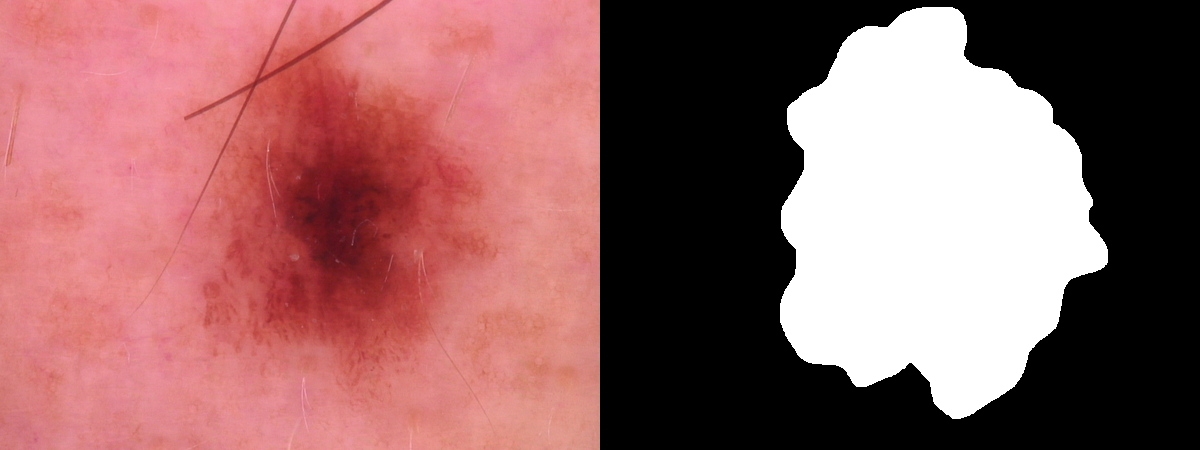

In [15]:
from PIL import Image
image1 = Image.open('/content/HAM10000/ISIC_0024306.jpg')
seg1 = Image.open('/content/HAM10000_segmentations_lesion_tschandl/ISIC_0024306_segmentation.png')

width1, height1 = image1.size
width2, height2 = seg1.size


merged_image = Image.new('RGB', (width1 + width2, max(height1, height2)))

merged_image.paste(image1, (0, 0))
merged_image.paste(seg1, (width1, 0))

merged_image.show()

In [16]:
import os

HAM_1 = "/content/HAM10000"
Masks = "/content/HAM10000_segmentations_lesion_tschandl"
test = "/content/ISIC2018_Task3_Test_Images"
img = [f for f in os.listdir(HAM_1) if f.endswith('.jpg')]
mask = [f for f in os.listdir(Masks) if f.endswith('.png')]
testing = [f for f in os.listdir(test) if f.endswith('.jpg')]

num_images_1 = len(img)
mask_1 = len(mask)
test_1 = len(testing)
print(f'Ham 1 : {num_images_1}')
print(f'Masks : {mask_1}')
print(f'Test : {test_1}')


Ham 1 : 10015
Masks : 10015
Test : 1511


In [17]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import resnet50
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd

In [18]:
from PIL import Image
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

batch_size = 16

# Define the paths to the CSV file, image folder and mask folder
csv_path = '/content/HAM10000_metadata'
img_folder_path = '/content/HAM10000'
mask_folder_path = '/content/HAM10000_segmentations_lesion_tschandl'

# Define the image size and transformations for training and validation
image_size = (128, 128)

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.Resize(image_size),
    # transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

mask_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.Resize(image_size),
    # transforms.CenterCrop(128),
    transforms.ToTensor()
    # transforms.Normalize([0.5, 0.5,0.5], [0.5,0.5,0.5])
])

def dull_razor(image):

      # covert image to gray scale 
      gray_scale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)



      #Black hat filter
      kernel = cv2.getStructuringElement(1,(9,9)) 
      blackhat = cv2.morphologyEx(gray_scale, cv2.MORPH_BLACKHAT, kernel)
      # Gaussian filter
      gaussian_filter = cv2.GaussianBlur(blackhat,(3,3),cv2.BORDER_DEFAULT)
      #Binary thresholding (MASK)
      _,mask = cv2.threshold(gaussian_filter,10,255,cv2.THRESH_BINARY)
      #Replace pixels of the mask
      result = cv2.inpaint(image,mask,6,cv2.INPAINT_TELEA) 



      return result


class HAM10000Dataset(Dataset):
    def __init__(self, data, img_folder_path, mask_folder_path, transform=None, mask_transform=None):
        self.data = data
        self.img_folder_path = img_folder_path
        self.mask_folder_path = mask_folder_path
        self.transform = transform
        self.mask_transform = mask_transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        img_id = self.data['image_id'].iloc[index]
        img_path = os.path.join(self.img_folder_path, f"{img_id}.jpg")
        mask_path = os.path.join(self.mask_folder_path, f"{img_id}_segmentation.png")
        
        img = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
        # img.show()
        # img = np.asarray( img, dtype="int32" )
        # img = dull_razor(img)
        # image = Image.fromarray(np.uint8(image)).convert('RGB')
        # print(img)
        
        if self.transform is not None:
            img = self.transform(img)
            mask = self.mask_transform(mask)
        
        return img, mask

# Read the CSV file
df = pd.read_csv(csv_path)

# Split the data into training and validation sets
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

# print(train_data)

# Create PyTorch datasets for training and validation
train_dataset = HAM10000Dataset(train_data, img_folder_path, mask_folder_path, train_transform, mask_transform)
val_dataset = HAM10000Dataset(val_data, img_folder_path, mask_folder_path, train_transform, mask_transform)

# Create PyTorch data loaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


Batch shape (Images): torch.Size([16, 3, 128, 128])
Batch shape (Masks): torch.Size([16, 1, 128, 128])
Batch size: 16


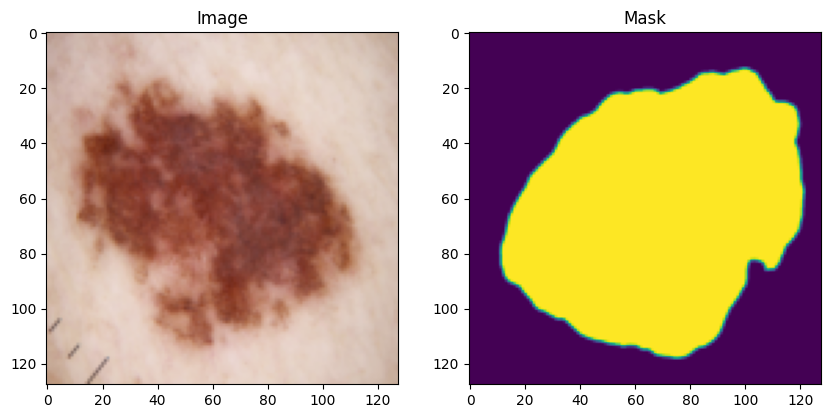

In [19]:
# Get a batch from the train_dataloader
data_iter = iter(train_dataloader)
images, masks = next(data_iter)

# Shape and size of the batch
print("Batch shape (Images):", images.shape)
print("Batch shape (Masks):", masks.shape)
print("Batch size:", images.size(0))

# Visualize a sample from the batch
import matplotlib.pyplot as plt

sample_index = 0  # Change this to see different samples

# Denormalize the image
image = images[sample_index].numpy().transpose((1, 2, 0))
mean = np.array(mean)
std = np.array(std)
image = std * image + mean
image = np.clip(image, 0, 1)

# Display the image and its corresponding mask
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Image")
ax[1].imshow(masks[sample_index].squeeze())
ax[1].set_title("Mask")
plt.show()


In [ ]:
!pip install segmentation-models-pytorch


EficientNet

In [ ]:
# import torch.optim as optim
# import segmentation_models_pytorch as smp
# from tqdm.auto import tqdm
# from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
# import os





# def calculate_metrics(preds, targets):
#     preds = torch.argmax(preds, dim=1).cpu().numpy()
#     targets = np.round(targets.cpu().numpy())
    
#     f1 = f1_score(targets.ravel(), preds.ravel(), average='weighted')
#     precision = precision_score(targets.ravel(), preds.ravel(), average='weighted', zero_division=0)
#     recall = recall_score(targets.ravel(), preds.ravel(), average='weighted')
#     accuracy = accuracy_score(targets.ravel(), preds.ravel())
    
#     return f1, precision, recall, accuracy






# # Set device to GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device('cpu')
# # Create the U-Net model
# # model = smp.Unet("resnet50", encoder_weights="imagenet", in_channels=3, classes=1).to(device)
# model = smp.Unet("efficientnet-b0", encoder_weights="imagenet", in_channels=3, classes=1).to(device)
# # Unfreeze code for Resnet50
# # # Freeze all layers in the encoder
# # for param in model.encoder.parameters():
# #     param.requires_grad = False

# # # Defreeze the last residual block (layer4) of the ResNet50 encoder
# # for param in model.encoder.layer4.parameters():
# #     param.requires_grad = True


# # Unfreeze code for EfficientNet
# # Freeze all layers in the encoder
# for param in model.encoder.parameters():
#     param.requires_grad = False

# # Defreeze the last block of the EfficientNet encoder (for EfficientNet-b0)
# for param in model.encoder._blocks[-1].parameters():
#     param.requires_grad = True


# # Set the loss function and optimizer
# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=2, verbose=True)


# # Set the loss function and optimizer
# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-4)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=2, verbose=True)
# # Set the number of training epochs
# num_epochs = 2

# # Training loop
# for epoch in range(num_epochs):
#     model.train()
#     train_loss = 0
#     train_f1, train_precision, train_recall, train_accuracy = 0, 0, 0, 0

#     for batch in tqdm(train_dataloader, desc=f"Training epoch {epoch + 1}/{num_epochs}"):
#         images, masks = batch
#         images = images.to(device)
#         masks = masks.to(device)

#         # Forward pass
#         optimizer.zero_grad()
#         outputs = model(images)


#         # Calculate loss
#         loss = criterion(outputs, masks.unsqueeze(1).squeeze(2).to(torch.float))


#         train_loss += loss.item()
#         # print(loss)
#         # Backward pass
#         loss.backward()
#         optimizer.step()

#         # Calculate metrics
#         f1, precision, recall, accuracy = calculate_metrics(outputs, masks)
#         train_f1 += f1
#         train_precision += precision
#         train_recall += recall
#         train_accuracy += accuracy

#     # Compute average metrics for the training set
#     train_loss /= len(train_dataloader)
#     train_f1 /= len(train_dataloader)
#     train_precision /= len(train_dataloader)
#     train_recall /= len(train_dataloader)
#     train_accuracy /= len(train_dataloader)

#     # Validation
#     model.eval()
#     val_loss = 0
#     val_f1, val_precision, val_recall, val_accuracy = 0, 0, 0, 0

#     with torch.no_grad():
#         for batch in tqdm(val_dataloader, desc=f"Validation epoch {epoch + 1}/{num_epochs}"):
#             images, masks = batch
#             images = images.to(device)
#             masks = masks.to(device)

#             # Forward pass
#             outputs = model(images)

    
#             loss = criterion(outputs, masks.unsqueeze(1).squeeze(2).to(torch.float))

         
#             val_loss += loss.item()

#             # Calculate metrics
#             f1, precision, recall, accuracy = calculate_metrics(outputs, masks)
#             val_f1 += f1
#             val_precision += precision
#             val_recall += recall
#             val_accuracy += accuracy

#     # Compute average metrics for the validation set
#     val_loss /= len(val_dataloader)
#     val_f1 /= len(val_dataloader)
#     val_precision /= len(val_dataloader)
#     val_recall /= len(val_dataloader)
#     val_accuracy /= len(val_dataloader)

#     print(f"Epoch {epoch + 1}/{num_epochs}")
#     print(f"Train Loss: {train_loss:.4f}, F1: {train_f1:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, Accuracy: {train_accuracy:.4f}")
#     print(f"Val Loss: {val_loss:.4f}, F1: {val_f1:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, Accuracy: {val_accuracy:.4f}")

#     scheduler.step(val_loss)


### U-Net3+ with skip connections and Focal loss


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import init

""" The code in this notebook cell is taken from:
Source: [UNET3_Plus](https://github.com/ZJUGiveLab/UNet-Version.git))

Please cite this paper if using this code: 
@misc{huang2020unet,
      title={UNet 3+: A Full-Scale Connected UNet for Medical Image Segmentation}, 
      author={Huimin Huang and Lanfen Lin and Ruofeng Tong and Hongjie Hu and Qiaowei Zhang and Yutaro Iwamoto and Xianhua Han and Yen-Wei Chen and Jian Wu},
      year={2020},
      eprint={2004.08790},
      archivePrefix={arXiv},
      primaryClass={eess.IV}
}
"""


def weights_init_normal(m):
    classname = m.__class__.__name__
    #print(classname)
    if classname.find('Conv') != -1:
        init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('Linear') != -1:
        init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        init.normal_(m.weight.data, 1.0, 0.02)
        init.constant_(m.bias.data, 0.0)


def weights_init_xavier(m):
    classname = m.__class__.__name__
    #print(classname)
    if classname.find('Conv') != -1:
        init.xavier_normal_(m.weight.data, gain=1)
    elif classname.find('Linear') != -1:
        init.xavier_normal_(m.weight.data, gain=1)
    elif classname.find('BatchNorm') != -1:
        init.normal_(m.weight.data, 1.0, 0.02)
        init.constant_(m.bias.data, 0.0)


def weights_init_kaiming(m):
    classname = m.__class__.__name__
    #print(classname)
    if classname.find('Conv') != -1:
        init.kaiming_normal_(m.weight.data, a=0, mode='fan_in')
    elif classname.find('Linear') != -1:
        init.kaiming_normal_(m.weight.data, a=0, mode='fan_in')
    elif classname.find('BatchNorm') != -1:
        init.normal_(m.weight.data, 1.0, 0.02)
        init.constant_(m.bias.data, 0.0)


def weights_init_orthogonal(m):
    classname = m.__class__.__name__
    #print(classname)
    if classname.find('Conv') != -1:
        init.orthogonal_(m.weight.data, gain=1)
    elif classname.find('Linear') != -1:
        init.orthogonal_(m.weight.data, gain=1)
    elif classname.find('BatchNorm') != -1:
        init.normal_(m.weight.data, 1.0, 0.02)
        init.constant_(m.bias.data, 0.0)


def init_weights(net, init_type='normal'):
    #print('initialization method [%s]' % init_type)
    if init_type == 'normal':
        net.apply(weights_init_normal)
    elif init_type == 'xavier':
        net.apply(weights_init_xavier)
    elif init_type == 'kaiming':
        net.apply(weights_init_kaiming)
    elif init_type == 'orthogonal':
        net.apply(weights_init_orthogonal)
    else:
        raise NotImplementedError('initialization method [%s] is not implemented' % init_type)

# def conv_block(in_channels, out_channels, transpose=False):
#     if transpose:
#         return [
#             nn.ConvTranspose2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.ReLU(inplace=True),
#             nn.BatchNorm2d(out_channels)
#         ]
#     else:
#         return [
#             nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.BatchNorm2d(out_channels),
#             nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.BatchNorm2d(out_channels),
#             nn.Ma7532
#             Training epoch 8/10: 100%
#             xPool2d(kernel_size=2, stride=2)
#         ]
class unetConv2(nn.Module):
    def __init__(self, in_size, out_size, is_batchnorm, n=2, ks=3, stride=1, padding=1):
        super(unetConv2, self).__init__()
        self.n = n
        self.ks = ks
        self.stride = stride
        self.padding = padding
        s = stride
        p = padding
        if is_batchnorm:
            for i in range(1, n + 1):
                conv = nn.Sequential(nn.Conv2d(in_size, out_size, ks, s, p),
                                     nn.BatchNorm2d(out_size),
                                     nn.ReLU(inplace=True), )
                setattr(self, 'conv%d' % i, conv)
                in_size = out_size

        else:
            for i in range(1, n + 1):
                conv = nn.Sequential(nn.Conv2d(in_size, out_size, ks, s, p),
                                     nn.ReLU(inplace=True), )
                setattr(self, 'conv%d' % i, conv)
                in_size = out_size

        # initialise the blocks
        for m in self.children():
            init_weights(m, init_type='kaiming')

    def forward(self, inputs):
        x = inputs
        for i in range(1, self.n + 1):
            conv = getattr(self, 'conv%d' % i)
            x = conv(x)

        return x


class UNet3(nn.Module):

    def __init__(self, in_channels=3, n_classes=1, feature_scale=4, is_deconv=True, is_batchnorm=True):
        super(UNet3, self).__init__()
        self.is_deconv = is_deconv
        self.in_channels = in_channels
        self.is_batchnorm = is_batchnorm
        self.feature_scale = feature_scale

        filters = [64, 128, 256, 512, 1024]

        ## -------------Encoder--------------
        self.conv1 = unetConv2(self.in_channels, filters[0], self.is_batchnorm)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = unetConv2(filters[0], filters[1], self.is_batchnorm)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = unetConv2(filters[1], filters[2], self.is_batchnorm)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)

        self.conv4 = unetConv2(filters[2], filters[3], self.is_batchnorm)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)

        self.conv5 = unetConv2(filters[3], filters[4], self.is_batchnorm)

        ## -------------Decoder--------------
        self.CatChannels = filters[0]
        self.CatBlocks = 5
        self.UpChannels = self.CatChannels * self.CatBlocks

        '''stage 4d'''
        # h1->320*320, hd4->40*40, Pooling 8 times
        self.h1_PT_hd4 = nn.MaxPool2d(8, 8, ceil_mode=True)
        self.h1_PT_hd4_conv = nn.Conv2d(filters[0], self.CatChannels, 3, padding=1)
        self.h1_PT_hd4_bn = nn.BatchNorm2d(self.CatChannels)
        self.h1_PT_hd4_relu = nn.ReLU(inplace=True)

        # h2->160*160, hd4->40*40, Pooling 4 times
        self.h2_PT_hd4 = nn.MaxPool2d(4, 4, ceil_mode=True)
        self.h2_PT_hd4_conv = nn.Conv2d(filters[1], self.CatChannels, 3, padding=1)
        self.h2_PT_hd4_bn = nn.BatchNorm2d(self.CatChannels)
        self.h2_PT_hd4_relu = nn.ReLU(inplace=True)

        # h3->80*80, hd4->40*40, Pooling 2 times
        self.h3_PT_hd4 = nn.MaxPool2d(2, 2, ceil_mode=True)
        self.h3_PT_hd4_conv = nn.Conv2d(filters[2], self.CatChannels, 3, padding=1)
        self.h3_PT_hd4_bn = nn.BatchNorm2d(self.CatChannels)
        self.h3_PT_hd4_relu = nn.ReLU(inplace=True)

        # h4->40*40, hd4->40*40, Concatenation
        self.h4_Cat_hd4_conv = nn.Conv2d(filters[3], self.CatChannels, 3, padding=1)
        self.h4_Cat_hd4_bn = nn.BatchNorm2d(self.CatChannels)
        self.h4_Cat_hd4_relu = nn.ReLU(inplace=True)

        # hd5->20*20, hd4->40*40, Upsample 2 times
        self.hd5_UT_hd4 = nn.Upsample(scale_factor=2, mode='bilinear')  # 14*14
        self.hd5_UT_hd4_conv = nn.Conv2d(filters[4], self.CatChannels, 3, padding=1)
        self.hd5_UT_hd4_bn = nn.BatchNorm2d(self.CatChannels)
        self.hd5_UT_hd4_relu = nn.ReLU(inplace=True)

        # fusion(h1_PT_hd4, h2_PT_hd4, h3_PT_hd4, h4_Cat_hd4, hd5_UT_hd4)
        self.conv4d_1 = nn.Conv2d(self.UpChannels, self.UpChannels, 3, padding=1)  # 16
        self.bn4d_1 = nn.BatchNorm2d(self.UpChannels)
        self.relu4d_1 = nn.ReLU(inplace=True)

        '''stage 3d'''
        # h1->320*320, hd3->80*80, Pooling 4 times
        self.h1_PT_hd3 = nn.MaxPool2d(4, 4, ceil_mode=True)
        self.h1_PT_hd3_conv = nn.Conv2d(filters[0], self.CatChannels, 3, padding=1)
        self.h1_PT_hd3_bn = nn.BatchNorm2d(self.CatChannels)
        self.h1_PT_hd3_relu = nn.ReLU(inplace=True)

        # h2->160*160, hd3->80*80, Pooling 2 times
        self.h2_PT_hd3 = nn.MaxPool2d(2, 2, ceil_mode=True)
        self.h2_PT_hd3_conv = nn.Conv2d(filters[1], self.CatChannels, 3, padding=1)
        self.h2_PT_hd3_bn = nn.BatchNorm2d(self.CatChannels)
        self.h2_PT_hd3_relu = nn.ReLU(inplace=True)

        # h3->80*80, hd3->80*80, Concatenation
        self.h3_Cat_hd3_conv = nn.Conv2d(filters[2], self.CatChannels, 3, padding=1)
        self.h3_Cat_hd3_bn = nn.BatchNorm2d(self.CatChannels)
        self.h3_Cat_hd3_relu = nn.ReLU(inplace=True)

        # hd4->40*40, hd4->80*80, Upsample 2 times
        self.hd4_UT_hd3 = nn.Upsample(scale_factor=2, mode='bilinear')  # 14*14
        self.hd4_UT_hd3_conv = nn.Conv2d(self.UpChannels, self.CatChannels, 3, padding=1)
        self.hd4_UT_hd3_bn = nn.BatchNorm2d(self.CatChannels)
        self.hd4_UT_hd3_relu = nn.ReLU(inplace=True)

        # hd5->20*20, hd4->80*80, Upsample 4 times
        self.hd5_UT_hd3 = nn.Upsample(scale_factor=4, mode='bilinear')  # 14*14
        self.hd5_UT_hd3_conv = nn.Conv2d(filters[4], self.CatChannels, 3, padding=1)
        self.hd5_UT_hd3_bn = nn.BatchNorm2d(self.CatChannels)
        self.hd5_UT_hd3_relu = nn.ReLU(inplace=True)

        # fusion(h1_PT_hd3, h2_PT_hd3, h3_Cat_hd3, hd4_UT_hd3, hd5_UT_hd3)
        self.conv3d_1 = nn.Conv2d(self.UpChannels, self.UpChannels, 3, padding=1)  # 16
        self.bn3d_1 = nn.BatchNorm2d(self.UpChannels)
        self.relu3d_1 = nn.ReLU(inplace=True)

        '''stage 2d '''
        # h1->320*320, hd2->160*160, Pooling 2 times
        self.h1_PT_hd2 = nn.MaxPool2d(2, 2, ceil_mode=True)
        self.h1_PT_hd2_conv = nn.Conv2d(filters[0], self.CatChannels, 3, padding=1)
        self.h1_PT_hd2_bn = nn.BatchNorm2d(self.CatChannels)
        self.h1_PT_hd2_relu = nn.ReLU(inplace=True)

        # h2->160*160, hd2->160*160, Concatenation
        self.h2_Cat_hd2_conv = nn.Conv2d(filters[1], self.CatChannels, 3, padding=1)
        self.h2_Cat_hd2_bn = nn.BatchNorm2d(self.CatChannels)
        self.h2_Cat_hd2_relu = nn.ReLU(inplace=True)

        # hd3->80*80, hd2->160*160, Upsample 2 times
        self.hd3_UT_hd2 = nn.Upsample(scale_factor=2, mode='bilinear')  # 14*14
        self.hd3_UT_hd2_conv = nn.Conv2d(self.UpChannels, self.CatChannels, 3, padding=1)
        self.hd3_UT_hd2_bn = nn.BatchNorm2d(self.CatChannels)
        self.hd3_UT_hd2_relu = nn.ReLU(inplace=True)

        # hd4->40*40, hd2->160*160, Upsample 4 times
        self.hd4_UT_hd2 = nn.Upsample(scale_factor=4, mode='bilinear')  # 14*14
        self.hd4_UT_hd2_conv = nn.Conv2d(self.UpChannels, self.CatChannels, 3, padding=1)
        self.hd4_UT_hd2_bn = nn.BatchNorm2d(self.CatChannels)
        self.hd4_UT_hd2_relu = nn.ReLU(inplace=True)

        # hd5->20*20, hd2->160*160, Upsample 8 times
        self.hd5_UT_hd2 = nn.Upsample(scale_factor=8, mode='bilinear')  # 14*14
        self.hd5_UT_hd2_conv = nn.Conv2d(filters[4], self.CatChannels, 3, padding=1)
        self.hd5_UT_hd2_bn = nn.BatchNorm2d(self.CatChannels)
        self.hd5_UT_hd2_relu = nn.ReLU(inplace=True)

        # fusion(h1_PT_hd2, h2_Cat_hd2, hd3_UT_hd2, hd4_UT_hd2, hd5_UT_hd2)
        self.conv2d_1 = nn.Conv2d(self.UpChannels, self.UpChannels, 3, padding=1)  # 16
        self.bn2d_1 = nn.BatchNorm2d(self.UpChannels)
        self.relu2d_1 = nn.ReLU(inplace=True)

        '''stage 1d'''
        # h1->320*320, hd1->320*320, Concatenation
        self.h1_Cat_hd1_conv = nn.Conv2d(filters[0], self.CatChannels, 3, padding=1)
        self.h1_Cat_hd1_bn = nn.BatchNorm2d(self.CatChannels)
        self.h1_Cat_hd1_relu = nn.ReLU(inplace=True)

        # hd2->160*160, hd1->320*320, Upsample 2 times
        self.hd2_UT_hd1 = nn.Upsample(scale_factor=2, mode='bilinear')  # 14*14
        self.hd2_UT_hd1_conv = nn.Conv2d(self.UpChannels, self.CatChannels, 3, padding=1)
        self.hd2_UT_hd1_bn = nn.BatchNorm2d(self.CatChannels)
        self.hd2_UT_hd1_relu = nn.ReLU(inplace=True)

        # hd3->80*80, hd1->320*320, Upsample 4 times
        self.hd3_UT_hd1 = nn.Upsample(scale_factor=4, mode='bilinear')  # 14*14
        self.hd3_UT_hd1_conv = nn.Conv2d(self.UpChannels, self.CatChannels, 3, padding=1)
        self.hd3_UT_hd1_bn = nn.BatchNorm2d(self.CatChannels)
        self.hd3_UT_hd1_relu = nn.ReLU(inplace=True)

        # hd4->40*40, hd1->320*320, Upsample 8 times
        self.hd4_UT_hd1 = nn.Upsample(scale_factor=8, mode='bilinear')  # 14*14
        self.hd4_UT_hd1_conv = nn.Conv2d(self.UpChannels, self.CatChannels, 3, padding=1)
        self.hd4_UT_hd1_bn = nn.BatchNorm2d(self.CatChannels)
        self.hd4_UT_hd1_relu = nn.ReLU(inplace=True)

        # hd5->20*20, hd1->320*320, Upsample 16 times
        self.hd5_UT_hd1 = nn.Upsample(scale_factor=16, mode='bilinear')  # 14*14
        self.hd5_UT_hd1_conv = nn.Conv2d(filters[4], self.CatChannels, 3, padding=1)
        self.hd5_UT_hd1_bn = nn.BatchNorm2d(self.CatChannels)
        self.hd5_UT_hd1_relu = nn.ReLU(inplace=True)

        # fusion(h1_Cat_hd1, hd2_UT_hd1, hd3_UT_hd1, hd4_UT_hd1, hd5_UT_hd1)
        self.conv1d_1 = nn.Conv2d(self.UpChannels, self.UpChannels, 3, padding=1)  # 16
        self.bn1d_1 = nn.BatchNorm2d(self.UpChannels)
        self.relu1d_1 = nn.ReLU(inplace=True)

        # output
        self.outconv1 = nn.Conv2d(self.UpChannels, n_classes, 3, padding=1)

        # initialise weights
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init_weights(m, init_type='kaiming')
            elif isinstance(m, nn.BatchNorm2d):
                init_weights(m, init_type='kaiming')

    def forward(self, inputs):
        ## -------------Encoder-------------
        h1 = self.conv1(inputs)  # h1->320*320*64

        h2 = self.maxpool1(h1)
        h2 = self.conv2(h2)  # h2->160*160*128

        h3 = self.maxpool2(h2)
        h3 = self.conv3(h3)  # h3->80*80*256

        h4 = self.maxpool3(h3)
        h4 = self.conv4(h4)  # h4->40*40*512

        h5 = self.maxpool4(h4)
        hd5 = self.conv5(h5)  # h5->20*20*1024

        ## -------------Decoder-------------
        h1_PT_hd4 = self.h1_PT_hd4_relu(self.h1_PT_hd4_bn(self.h1_PT_hd4_conv(self.h1_PT_hd4(h1))))
        h2_PT_hd4 = self.h2_PT_hd4_relu(self.h2_PT_hd4_bn(self.h2_PT_hd4_conv(self.h2_PT_hd4(h2))))
        h3_PT_hd4 = self.h3_PT_hd4_relu(self.h3_PT_hd4_bn(self.h3_PT_hd4_conv(self.h3_PT_hd4(h3))))
        h4_Cat_hd4 = self.h4_Cat_hd4_relu(self.h4_Cat_hd4_bn(self.h4_Cat_hd4_conv(h4)))
        hd5_UT_hd4 = self.hd5_UT_hd4_relu(self.hd5_UT_hd4_bn(self.hd5_UT_hd4_conv(self.hd5_UT_hd4(hd5))))
        hd4 = self.relu4d_1(self.bn4d_1(self.conv4d_1(
            torch.cat((h1_PT_hd4, h2_PT_hd4, h3_PT_hd4, h4_Cat_hd4, hd5_UT_hd4), 1)))) # hd4->40*40*UpChannels

        h1_PT_hd3 = self.h1_PT_hd3_relu(self.h1_PT_hd3_bn(self.h1_PT_hd3_conv(self.h1_PT_hd3(h1))))
        h2_PT_hd3 = self.h2_PT_hd3_relu(self.h2_PT_hd3_bn(self.h2_PT_hd3_conv(self.h2_PT_hd3(h2))))
        h3_Cat_hd3 = self.h3_Cat_hd3_relu(self.h3_Cat_hd3_bn(self.h3_Cat_hd3_conv(h3)))
        hd4_UT_hd3 = self.hd4_UT_hd3_relu(self.hd4_UT_hd3_bn(self.hd4_UT_hd3_conv(self.hd4_UT_hd3(hd4))))
        hd5_UT_hd3 = self.hd5_UT_hd3_relu(self.hd5_UT_hd3_bn(self.hd5_UT_hd3_conv(self.hd5_UT_hd3(hd5))))
        hd3 = self.relu3d_1(self.bn3d_1(self.conv3d_1(
            torch.cat((h1_PT_hd3, h2_PT_hd3, h3_Cat_hd3, hd4_UT_hd3, hd5_UT_hd3), 1)))) # hd3->80*80*UpChannels

        h1_PT_hd2 = self.h1_PT_hd2_relu(self.h1_PT_hd2_bn(self.h1_PT_hd2_conv(self.h1_PT_hd2(h1))))
        h2_Cat_hd2 = self.h2_Cat_hd2_relu(self.h2_Cat_hd2_bn(self.h2_Cat_hd2_conv(h2)))
        hd3_UT_hd2 = self.hd3_UT_hd2_relu(self.hd3_UT_hd2_bn(self.hd3_UT_hd2_conv(self.hd3_UT_hd2(hd3))))
        hd4_UT_hd2 = self.hd4_UT_hd2_relu(self.hd4_UT_hd2_bn(self.hd4_UT_hd2_conv(self.hd4_UT_hd2(hd4))))
        hd5_UT_hd2 = self.hd5_UT_hd2_relu(self.hd5_UT_hd2_bn(self.hd5_UT_hd2_conv(self.hd5_UT_hd2(hd5))))
        hd2 = self.relu2d_1(self.bn2d_1(self.conv2d_1(
            torch.cat((h1_PT_hd2, h2_Cat_hd2, hd3_UT_hd2, hd4_UT_hd2, hd5_UT_hd2), 1)))) # hd2->160*160*UpChannels

        h1_Cat_hd1 = self.h1_Cat_hd1_relu(self.h1_Cat_hd1_bn(self.h1_Cat_hd1_conv(h1)))
        hd2_UT_hd1 = self.hd2_UT_hd1_relu(self.hd2_UT_hd1_bn(self.hd2_UT_hd1_conv(self.hd2_UT_hd1(hd2))))
        hd3_UT_hd1 = self.hd3_UT_hd1_relu(self.hd3_UT_hd1_bn(self.hd3_UT_hd1_conv(self.hd3_UT_hd1(hd3))))
        hd4_UT_hd1 = self.hd4_UT_hd1_relu(self.hd4_UT_hd1_bn(self.hd4_UT_hd1_conv(self.hd4_UT_hd1(hd4))))
        hd5_UT_hd1 = self.hd5_UT_hd1_relu(self.hd5_UT_hd1_bn(self.hd5_UT_hd1_conv(self.hd5_UT_hd1(hd5))))
        hd1 = self.relu1d_1(self.bn1d_1(self.conv1d_1(
            torch.cat((h1_Cat_hd1, hd2_UT_hd1, hd3_UT_hd1, hd4_UT_hd1, hd5_UT_hd1), 1)))) # hd1->320*320*UpChannels

        d1 = self.outconv1(hd1)  # d1->320*320*n_classes
        return torch.sigmoid(d1)




in_channels = 3
out_channels = 1
unet3 = UNet3(in_channels, out_channels)


In [22]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Usage:
model = UNet3()  # Replace this with your model
total_parameters = count_parameters(model)
print(f"Total number of parameters: {total_parameters}")


Total number of parameters: 26971777


In [23]:
import torch
import torch.nn.functional as F

def ms_ssim_loss(pred, target, num_scale=5, weights=None):
    """
    Multi-scale Structural Similarity Index (MS-SSIM) loss function.
    
    Args:
        pred: predicted segmentation map, a PyTorch tensor of shape (batch_size, num_classes, height, width)
        target: ground truth segmentation map, a PyTorch tensor of shape (batch_size, num_classes, height, width)
        num_scale: number of scales to use for MS-SSIM, default is 5
        weights: a list of weights for each scale, default is None and equal weights will be used
    
    Returns:
        MS-SSIM loss value, a PyTorch scalar
    """
    # Define constants
    C1 = 0.01**2
    C2 = 0.03**2
    
    # Calculate mean and variance for prediction and target
    mu_pred = pred.mean(dim=(2, 3), keepdim=True)
    mu_target = target.mean(dim=(2, 3), keepdim=True)
    sigma_pred_sq = ((pred - mu_pred)**2).mean(dim=(2, 3), keepdim=True)
    sigma_target_sq = ((target - mu_target)**2).mean(dim=(2, 3), keepdim=True)
    sigma_pred_target = ((pred - mu_pred) * (target - mu_target)).mean(dim=(2, 3), keepdim=True)
    
    # Define weights for each scale
    if weights is None:
        weights = [1.0/num_scale] * num_scale
    assert len(weights) == num_scale, "Number of weights should equal the number of scales"
    
    # Initialize MS-SSIM loss value
    ms_ssim_loss = 0.0
    
    # Calculate MS-SSIM loss for each scale
    for scale in range(num_scale):
        scale_factor = 2 ** (num_scale - scale - 1)
        size = (scale_factor * mu_pred.shape[2], scale_factor * mu_pred.shape[3])
        
        # Resize mean and variance to the current scale
        mu_pred_scale = F.interpolate(mu_pred, size=size, mode='bilinear', align_corners=True)
        mu_target_scale = F.interpolate(mu_target, size=size, mode='bilinear', align_corners=True)
        sigma_pred_sq_scale = F.interpolate(sigma_pred_sq, size=size, mode='bilinear', align_corners=True)
        sigma_target_sq_scale = F.interpolate(sigma_target_sq, size=size, mode='bilinear', align_corners=True)
        sigma_pred_target_scale = F.interpolate(sigma_pred_target, size=size, mode='bilinear', align_corners=True)
        
        # Calculate SSIM for the current scale
        ssim_numerator = (2 * mu_pred_scale * mu_target_scale + C1) * (2 * sigma_pred_target_scale + C2)
        ssim_denominator = (mu_pred_scale**2 + mu_target_scale**2 + C1) * (sigma_pred_sq_scale + sigma_target_sq_scale + C2)
        ssim = ssim_numerator / ssim_denominator
        
        # Calculate MS-SSIM for the current scale
        if scale == num_scale - 1:
            ms_ssim_loss += weights[scale] * (1 - ssim)
        else:
            ms_ssim_loss += weights[scale] * (1 - ssim.mean(dim=(2, 3), keepdim=True))
    
    return ms_ssim_loss


DeepLabV3Plus + U-Net

In [ ]:
import torch.optim as optim
import segmentation_models_pytorch as smp
from tqdm.auto import tqdm
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import os


class DiceLoss(torch.nn.Module):
    def __init__(self, eps=1e-7):
        super(DiceLoss, self).__init__()
        self.eps = eps

    def forward(self, logits, targets):
        num = targets.size(0)
        probability = torch.sigmoid(logits)
        probability = probability.view(num, -1)
        targets = targets.view(num, -1)
        intersection = 2.0 * (probability * targets).sum() + self.eps
        union = probability.sum() + targets.sum() + self.eps

        loss = 1.0 - intersection / union
        return loss


class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2, reduce=True):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduce = reduce

    def forward(self, logits, targets):
        targets = targets.unsqueeze(1)
        BCE_loss = F.binary_cross_entropy_with_logits(logits, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduce:
            return torch.mean(F_loss)
        else:
            return F_loss


class CombinedLoss(nn.Module):
    def __init__(self, alpha=0.5):
        super(CombinedLoss, self).__init__()
        self.alpha = alpha
        self.dice_loss = DiceLoss()
        self.bce_loss = nn.BCEWithLogitsLoss()

    def forward(self, logits, targets):
        return self.alpha * self.dice_loss(logits, targets) + (1 - self.alpha) * self.bce_loss(logits, targets.unsqueeze(1).squeeze(2).to(torch.float))








def calculate_metrics(preds, targets):
    preds = torch.argmax(preds, dim=1).cpu().numpy()
    targets = np.round(targets.cpu().numpy())
    
    f1 = f1_score(targets.ravel(), preds.ravel(), average='weighted')
    precision = precision_score(targets.ravel(), preds.ravel(), average='weighted', zero_division=0)
    recall = recall_score(targets.ravel(), preds.ravel(), average='weighted')
    accuracy = accuracy_score(targets.ravel(), preds.ravel())
    
    return f1, precision, recall, accuracy






# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = smp.Unet("efficientnet-b0", encoder_weights="imagenet", in_channels=3, classes=1).to(device)

deeplab_model = smp.DeepLabV3Plus("resnet50", encoder_weights="imagenet", in_channels=3, classes=1).to(device)



# Unfreeze code for EfficientNet/resnet50
# Freeze all layers in the encoder
for param in model.encoder.parameters():
    param.requires_grad = False
for param in deeplab_model.encoder.parameters():
    param.requires_grad = False



# Defreeze the last block of the EfficientNet encoder (for EfficientNet-b0)
for param in model.encoder._blocks[-1].parameters():
    param.requires_grad = True


# Defreeze the last residual block (layer4) of the ResNet50 encoder
for param in deeplab_model.encoder.layer4.parameters():
    param.requires_grad = True


class CombinedModel(torch.nn.Module):
    def __init__(self, unet_model, deeplab_model):
        super(CombinedModel, self).__init__()
        self.unet_model = unet_model
        self.deeplab_model = deeplab_model
        self.final_conv = torch.nn.Conv2d(2, 1, kernel_size=1)

    # def forward(self, x):
    #     unet_out = self.unet_model(x)
    #     deeplab_out = self.deeplab_model(x)
    #     combined = torch.cat((unet_out, deeplab_out), dim=1)
    #     out = self.final_conv(combined)
    #     return out
    def forward(self, x):
      unet_out = self.unet_model(x)
      deeplab_out = self.deeplab_model(x)
      out = (unet_out + deeplab_out) / 2
      return out

model = CombinedModel(model, deeplab_model).to(device)






# Set the loss function and optimizer
# criterion = nn.BCEWithLogitsLoss()
# criterion = FocalLoss()
criterion = CombinedLoss()
# criterion = DiceLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=1, verbose=True)

# Set the number of training epochs
num_epochs = 20

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_f1, train_precision, train_recall, train_accuracy = 0, 0, 0, 0

    for batch in tqdm(train_dataloader, desc=f"Training epoch {epoch + 1}/{num_epochs}"):
        images, masks = batch
        images = images.to(device)
        masks = masks.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(images)


        # Calculate loss
        loss = criterion(outputs, masks.unsqueeze(1).squeeze(2).to(torch.float))


        train_loss += loss.item()
        # print(loss)
        # Backward pass
        loss.backward()
        optimizer.step()

        # Calculate metrics
        f1, precision, recall, accuracy = calculate_metrics(outputs, masks)
        train_f1 += f1
        train_precision += precision
        train_recall += recall
        train_accuracy += accuracy
        tqdm.write(f"Train Loss: {loss.item():.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}")
    # Compute average metrics for the training set
    train_loss /= len(train_dataloader)
    train_f1 /= len(train_dataloader)
    train_precision /= len(train_dataloader)
    train_recall /= len(train_dataloader)
    train_accuracy /= len(train_dataloader)
    
    # Validation
    model.eval()
    val_loss = 0
    val_f1, val_precision, val_recall, val_accuracy = 0, 0, 0, 0

    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc=f"Validation epoch {epoch + 1}/{num_epochs}"):
            images, masks = batch
            images = images.to(device)
            masks = masks.to(device)

            # Forward pass
            outputs = model(images)

    
            loss = criterion(outputs, masks.unsqueeze(1).squeeze(2).to(torch.float))

         
            val_loss += loss.item()

            # Calculate metrics
            f1, precision, recall, accuracy = calculate_metrics(outputs, masks)
            val_f1 += f1
            val_precision += precision
            val_recall += recall
            val_accuracy += accuracy

    # Compute average metrics for the validation set
    val_loss /= len(val_dataloader)
    val_f1 /= len(val_dataloader)
    val_precision /= len(val_dataloader)
    val_recall /= len(val_dataloader)
    val_accuracy /= len(val_dataloader)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, F1: {train_f1:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss:.4f}, F1: {val_f1:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, Accuracy: {val_accuracy:.4f}")

    scheduler.step(val_loss)


In [ ]:
model

In [26]:
model_save_path = "/content/unet3_model.pt"
torch.save(unet3.state_dict(), model_save_path)
!cp -r /content/unet3_model.pt /content/drive/MyDrive/Deep_Learning_COM3025

In [ ]:
# Create the model with the same architecture
loaded_model = CombinedModel(smp.Unet("efficientnet-b0", encoder_weights=None, in_channels=3, classes=1),
                             smp.DeepLabV3Plus("resnet50", encoder_weights=None, in_channels=3, classes=1))
loaded_model = loaded_model.to(device)

# Load the saved state dictionary
model_save_path = "/content/combined_model.pt"
loaded_model.load_state_dict(torch.load(model_save_path))


In [25]:

class HAM10000TestDataset(Dataset):
    def __init__(self, img_folder_path, transform=None):
        self.img_folder_path = img_folder_path
        self.transform = transform
        self.img_filenames = os.listdir(img_folder_path)
        
    def __len__(self):
        return len(self.img_filenames)
    
    def __getitem__(self, index):
        img_filename = self.img_filenames[index]
        img_id = os.path.splitext(img_filename)[0]
        img_path = os.path.join(self.img_folder_path, f"{img_id}.jpg")
        
        img = Image.open(img_path).convert('RGB')
        
        if self.transform is not None:
            img = self.transform(img)
        
        return img


In [27]:
test_img_folder_path = '/content/ISIC2018_Task3_Test_Images'

test_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_dataset = HAM10000TestDataset(test_img_folder_path, test_transform)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


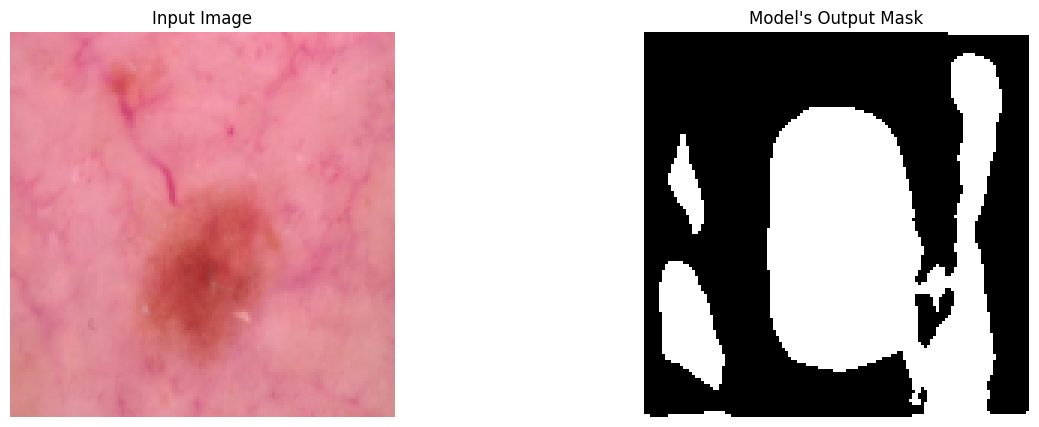

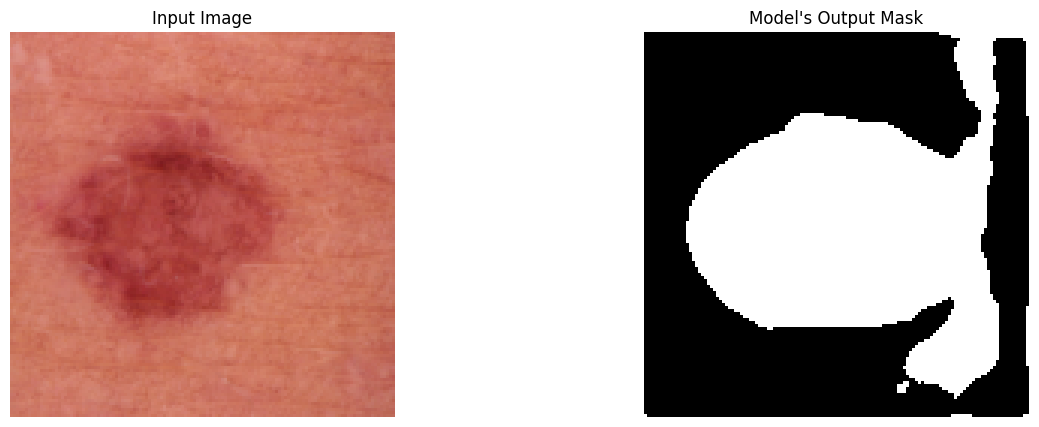

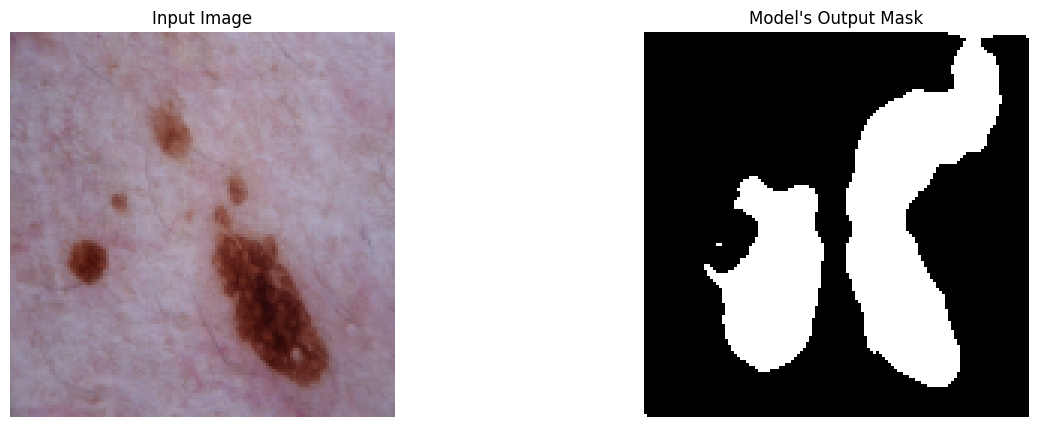

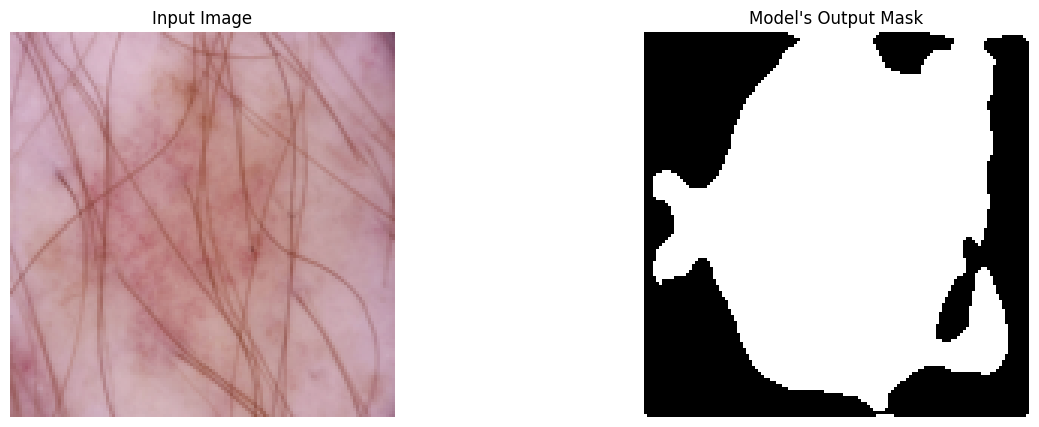

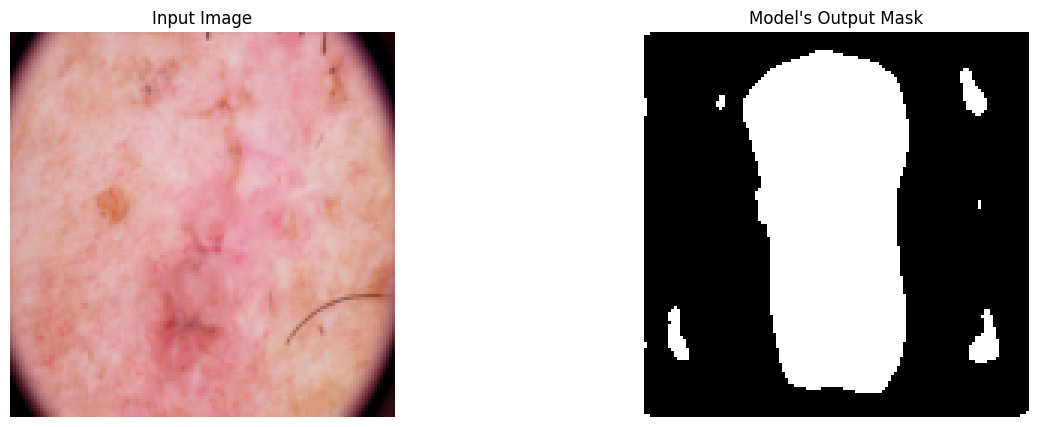

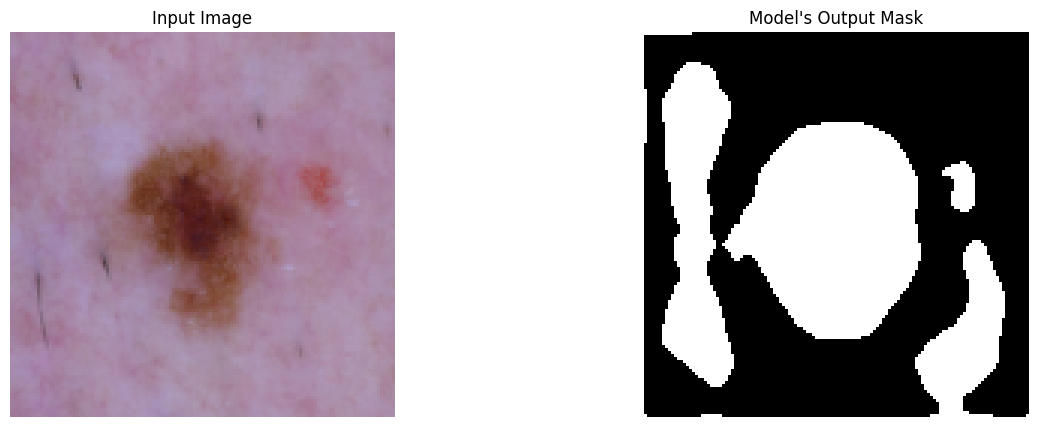

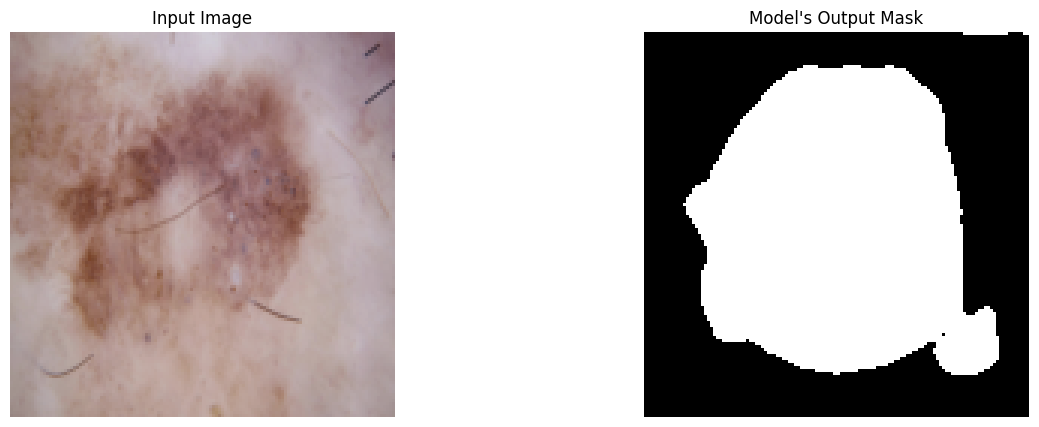

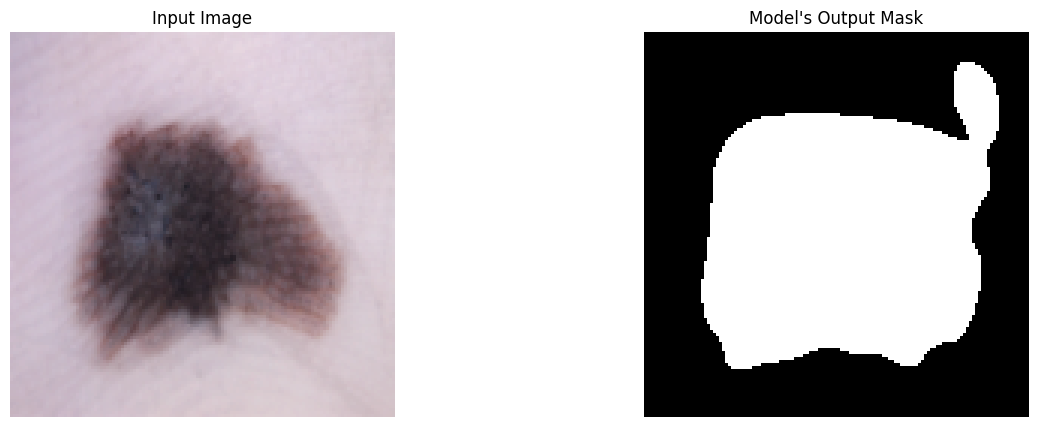

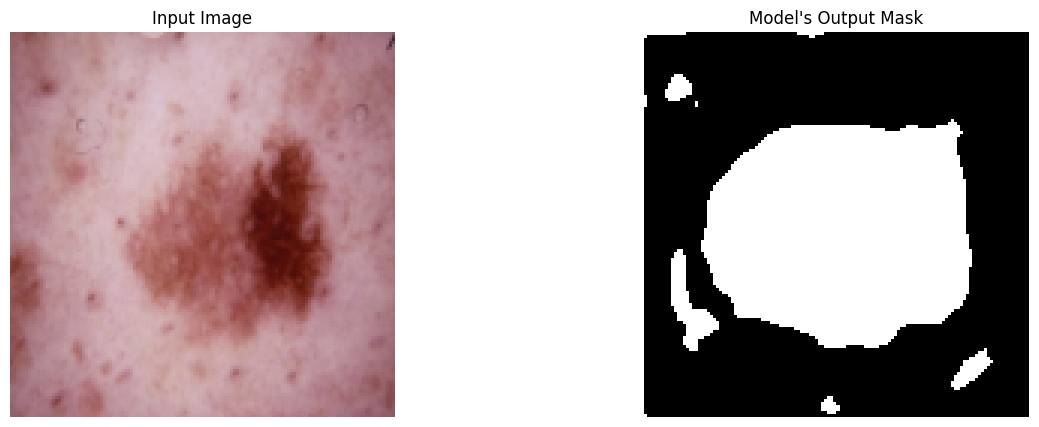

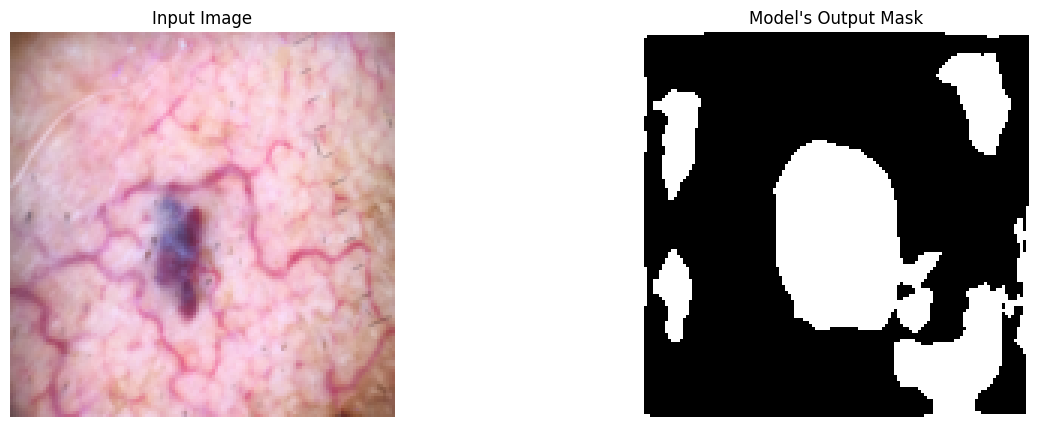

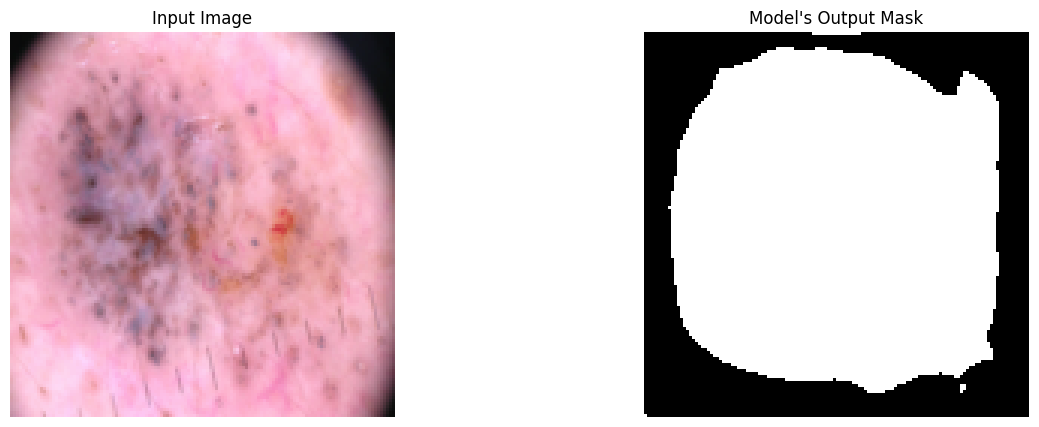

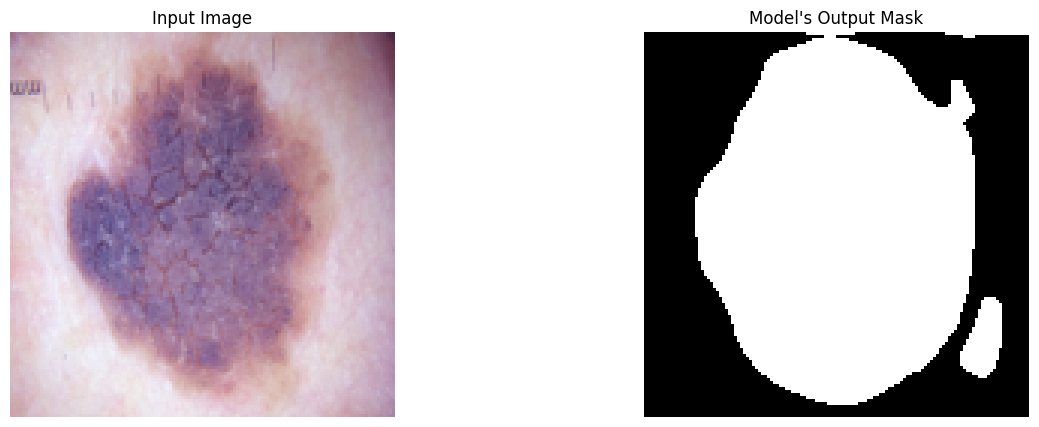

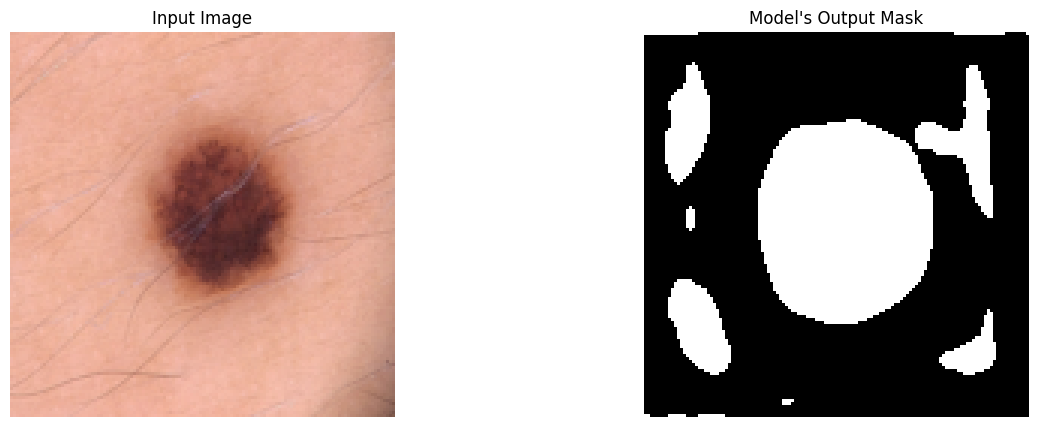

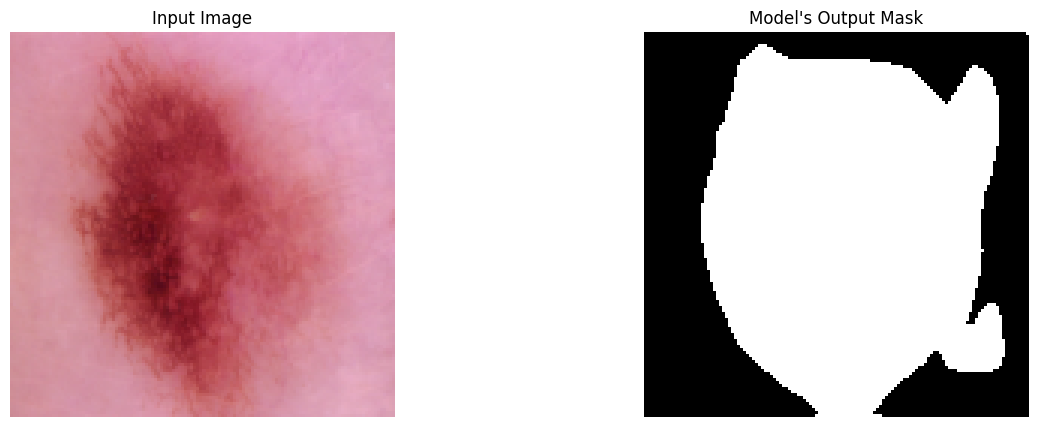

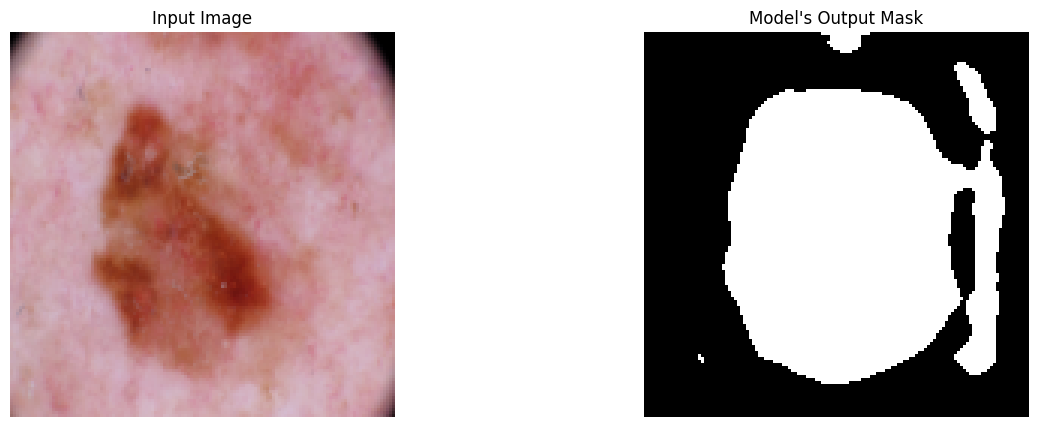

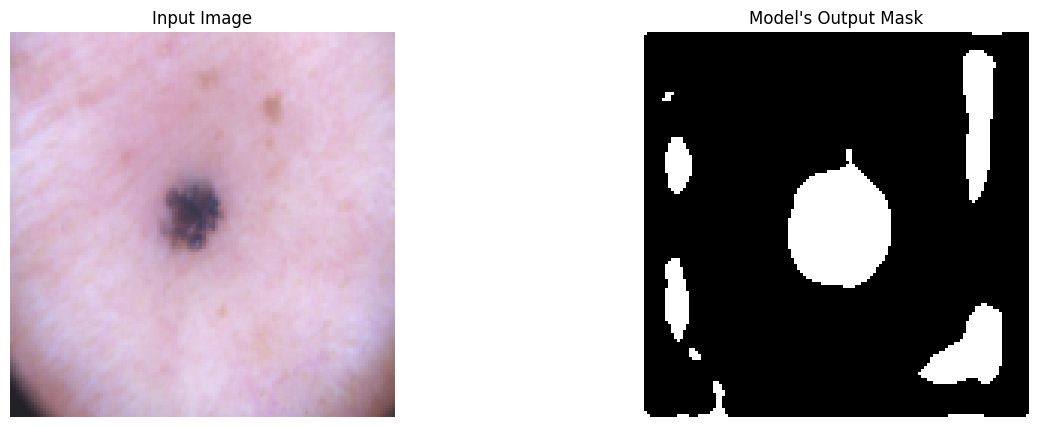

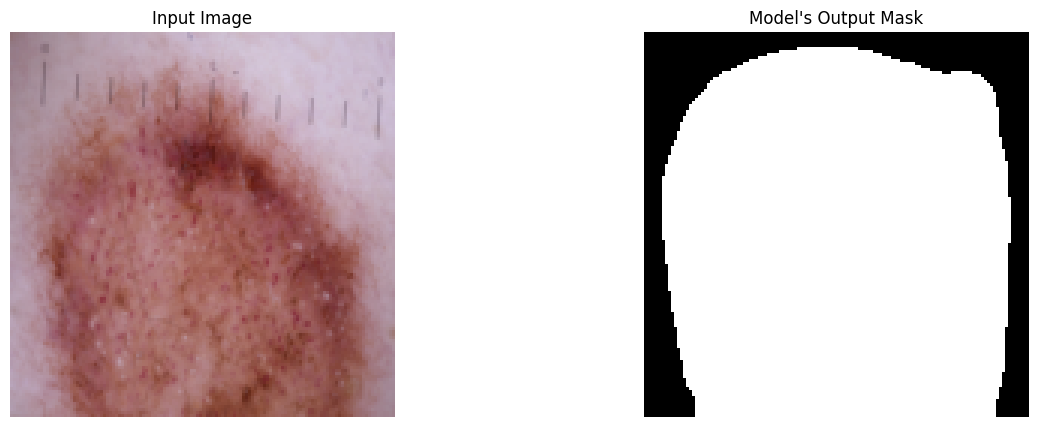

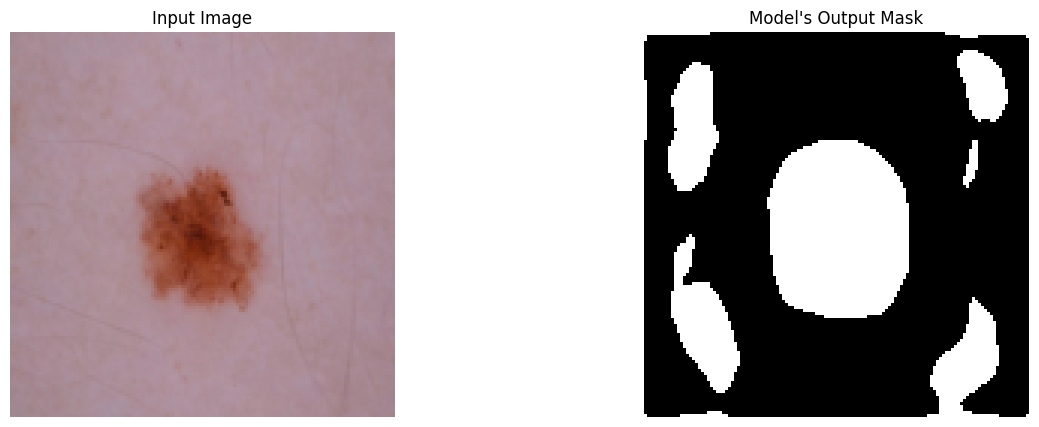

FileNotFoundError: ignored

In [34]:
import matplotlib.pyplot as plt

def visualize_results(image, output):
    fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15, 5))

    # Display input image
    image = image.permute(1, 2, 0).numpy()
    image = (image * std + mean).clip(0, 1)
    ax1.imshow(image)
    ax1.set_title("Input Image")
    ax1.axis("off")


    # Display model's output mask
    output = torch.sigmoid(output).squeeze().detach().cpu().numpy()
    output = (output > 0.5).astype(np.uint8)
    ax3.imshow(output, cmap="gray")
    ax3.set_title("Model's Output Mask")
    ax3.axis("off")

    plt.show()

unet3.eval()

# Test loop
with torch.no_grad():
    count = 0

    for i, images in enumerate(test_dataloader):
        images = images.to(device)

        # Forward pass
        outputs = unet3(images)
       
        # Display results
        for j in range(images.size(0)):
            visualize_results(images[j].cpu(),  outputs[j].cpu())

            # if count >= 5:  # Change this number to control how many batches of images you want to visualize
            break
            count += 1
